In [39]:
import src.Functions as Fu
import src.Filter as Ft
import src.getFingerprint as gF
import src.maindir as md
import src.extraUtils as eu
import numpy as np
import os
import cv2 as cv
import pickle
# import pandas as pd



In [ ]:
# # extracting Fingerprint from same size images in a path
# data_dir = '/data/Sali/camera_fingerprint/CameraFingerprint/D01/flat'
# Images = [os.path.join(data_dir, fname) for fname in os.listdir(data_dir) if fname.endswith('.jpg')]

# RP,_,_ = gF.getFingerprint(Images)
# RP = Fu.rgb2gray1(RP)
# sigmaRP = np.std(RP)
# Fingerprint = Fu.WienerInDFT(RP, sigmaRP)


In [ ]:
# # To save RP in a '.mat' file:
# import scipy.io as sio
# sio.savemat('Fingerprint.mat', {'RP': RP, 'sigmaRP': sigmaRP, 'Fingerprint': Fingerprint})

# imx = '/data/Sali/camera_fingerprint/CameraFingerprint/D01/nat/D01_I_nat_0002.jpg'
# Noisex = Ft.NoiseExtractFromImage(imx, sigma=2.)
# Noisex = Fu.WienerInDFT(Noisex, np.std(Noisex))

# # The optimal detector (see publication "Large Scale Test of Sensor Fingerprint Camera Identification")
# Ix = cv.cvtColor(cv.imread(imx),# image in BGR format
#                  cv.COLOR_BGR2GRAY)

# C = Fu.crosscorr(Noisex,np.multiply(Ix, Fingerprint))
# print(C)
# det, det0 = md.PCE(C)
# for key in det.keys(): print("{0}: {1}".format(key, det[key]))
# # eu.mesh(C)


In [ ]:
def PCE(Fingerprint, test_img_path):

    """    :param Fingerprint: Fingerprint matrix extracted from a set of images
    :param test_img_path: Path to the test image
    :return: Dictionary with detection results
    """
    
    test_img = cv.imread(test_img_path)
    if Fingerprint.shape != test_img.shape:
        test_img = cv.resize(test_img, (Fingerprint.shape[1], Fingerprint.shape[0]))        


    Noisex = Ft.NoiseExtractFromImage(test_img, sigma=2.)
    Noisex = Fu.WienerInDFT(Noisex, np.std(Noisex))

    # The optimal detector (see publication "Large Scale Test of Sensor Fingerprint Camera Identification")
    Ix = cv.cvtColor(test_img,# image in BGR format
                    cv.COLOR_BGR2GRAY)

    C = Fu.crosscorr(Noisex,np.multiply(Ix, Fingerprint))

    det, det0 = md.PCE(C)

    return det


In [28]:
camera_dir = '/data/Sali/camera_fingerprint/Vision_dataset_organized'
camera_lst = ['D01', 'D02', 'D03', 'D04', 'D05', 'D06', 'D07', 'D08', 'D09', 'D10',]


In [ ]:
def PRNU_calculator_for_multiple_cameras(cameras_dir, camera_lst):
    # extracting Fingerprint from same size images in a path

    """extracts PRNU fingerprints from multiple cameras and returns a list of tuples
    where each tuple contains the camera name and its corresponding fingerprint matrix.
    :param cameras_dir: Directory containing subdirectories for each camera
    :param camera_lst: List of camera subdirectory names
    :return: List of tuples (camera_name, fingerprint_matrix)
    """
    
    list_of_fingerprints = []
    for camera in camera_lst:
        camera_dir = os.path.join(cameras_dir, camera)

        flat_imgs_dir = os.path.join(camera_dir, 'flat')

        Images = [os.path.join(flat_imgs_dir, fname) for fname in os.listdir(flat_imgs_dir) if fname.endswith('.jpg')][:25]


        RP,_,_ = gF.getFingerprint(Images)
        RP = Fu.rgb2gray1(RP)
        sigmaRP = np.std(RP)
        Fingerprint = Fu.WienerInDFT(RP, sigmaRP)

        list_of_fingerprints.append((camera, Fingerprint))

######## FIND A WAY TO SAVE THE FINGERPRINTS INTO A DATAFRAME ###############
    # with open('fingerprints_list.pkl', 'wb') as file:
    #     pickle.dump(list_of_fingerprints, file)

    # data = np.array(list_of_fingerprints, dtype=object)
    # np.save('fingerprints_list.npy', data)

    return list_of_fingerprints

list_of_fingerprints = PRNU_calculator_for_multiple_cameras(camera_dir, camera_lst)

In [30]:
list_of_fingerprints

[('D01',
  array([[-0.13526982,  0.36675803,  0.42377744, ...,  0.42182689,
          -0.49349205, -0.20181846],
         [-0.23877777, -0.26135206, -1.09303023, ...,  0.24303332,
          -0.74989189,  1.13283378],
         [ 1.29750632,  1.40686621,  0.84406116, ...,  0.2261639 ,
          -0.01767141,  0.01900126],
         ...,
         [-0.36605441,  1.00326359, -0.58330107, ...,  0.52032868,
          -0.01467466, -0.69234561],
         [ 0.97814517,  1.6257805 , -0.6377048 , ...,  0.10238322,
           0.54767809,  0.18124331],
         [-0.31075452,  0.22136782, -0.52198364, ...,  0.17972364,
          -0.18589059, -0.15641192]])),
 ('D02',
  array([[-0.48544925,  0.0150008 , -0.27332084, ...,  0.2768821 ,
           0.1584752 ,  0.02563459],
         [-0.16877024, -0.29015244, -1.26033319, ...,  0.32102137,
           0.42029893, -0.48786167],
         [ 0.633577  ,  0.51839821, -0.36254024, ..., -0.17304782,
          -0.03323518, -1.13559395],
         ...,
         [ 1.27

In [33]:
import matplotlib.pyplot as plt

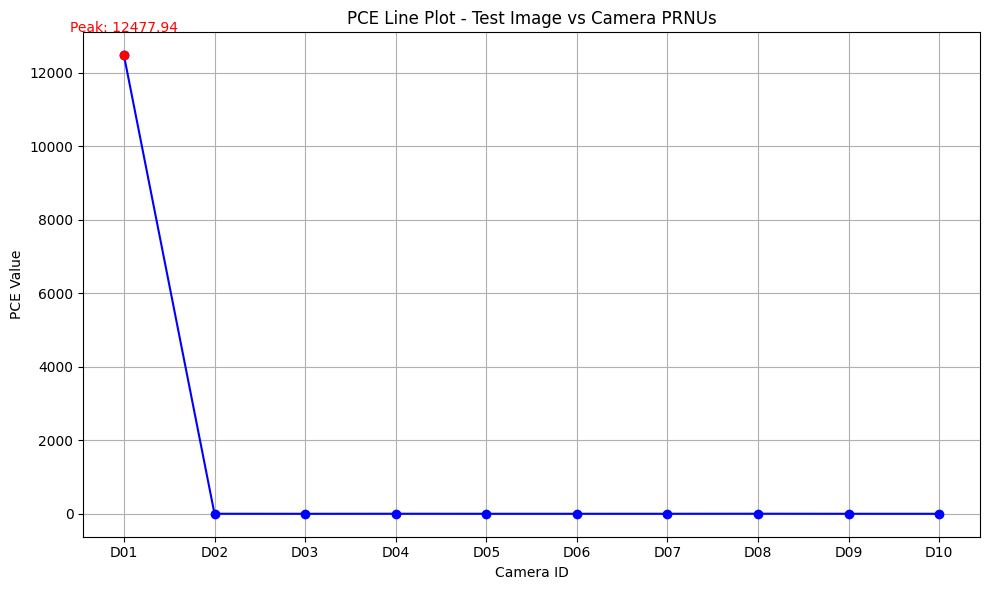

In [ ]:
def PCE_array(camera_lst, PRNU_lst, test_img_path):

    """"extracts PCE values for a test image against multiple camera PRNU fingerprints
    :param camera_lst: List of camera IDs
    :param PRNU_lst: List of tuples containing camera names and their corresponding PRNU fingerprints
    :param test_img_path: Path to the test image
    :return: List of PCE values for each camera"""
    
    PCE_values = []

    for camera, camera_PRNU_pair in zip(camera_lst, PRNU_lst):
        PRNU = camera_PRNU_pair[1]

        det = PCE(PRNU, test_img_path)
        pce = det['PCE']
        PCE_values.append(pce)

    plt.figure(figsize=(10, 6))

    plt.plot(camera_lst, PCE_values, marker='o', linestyle='-', color='b')

    # Annotate peak
    max_index = PCE_values.index(max(PCE_values))
    plt.plot(camera_lst[max_index], PCE_values[max_index], 'ro')  # red dot on peak
    plt.text(camera_lst[max_index], PCE_values[max_index]*1.05,
             f"Peak: {PCE_values[max_index]:.2f}", ha='center', fontsize=10, color='red')

    plt.title('PCE Line Plot - Test Image vs Camera PRNUs')
    plt.xlabel('Camera ID')
    plt.ylabel('PCE Value')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    return PCE_values

test_img_path = '/data/Sali/camera_fingerprint/Vision_dataset_organized/D01/nat/D01_I_nat_0002.jpg'

pce_list = PCE_array(camera_lst, list_of_fingerprints, test_img_path)



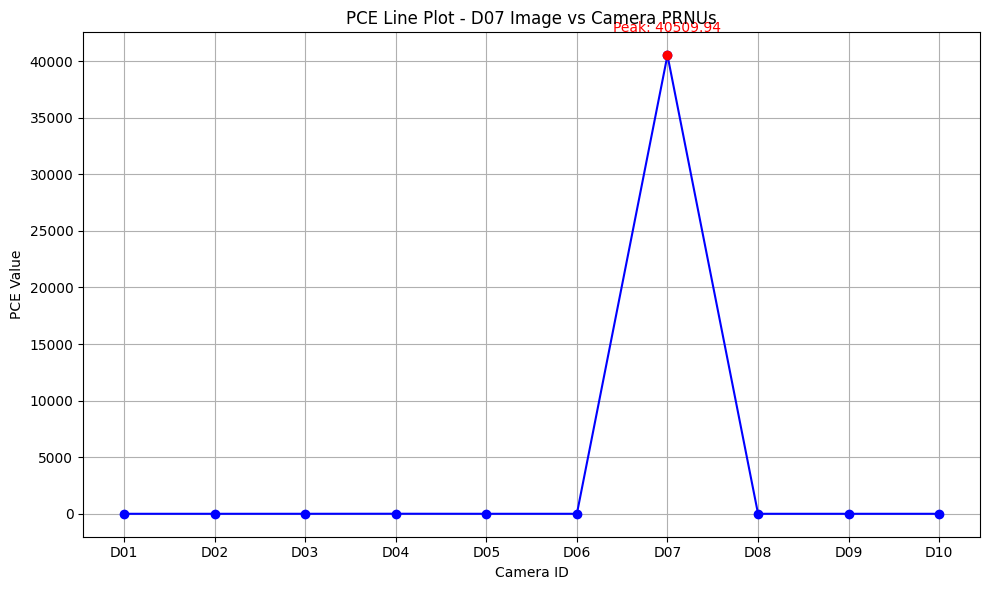

In [ ]:

test_img_path = '/data/Sali/camera_fingerprint/Vision_dataset_organized/D07/flat/D07_I_flat_0002.jpg'

pce_list = PCE_array(camera_lst, list_of_fingerprints, test_img_path)



In [38]:
pce_list

[np.float64(0.17477249022396826),
 np.float64(-0.1242931023206674),
 np.float64(0.8221774610852497),
 np.float64(4.21352898684372),
 np.float64(0.33027047005123494),
 np.float64(0.6581752551479066),
 np.float64(40509.94017176712),
 np.float64(-0.1707695065107592),
 np.float64(0.02501996616236703),
 np.float64(0.021461206749917108)]

In [35]:
#  
# find PCE for each camera, and plot the peak correlation energyrandomly pick images, and determine what camera it belongs to
# determne the PCE threshold that determines whether a camera belongs to a certain camera or not
# taking those images and compress them, (post processing), resizing cropping, color correction
# create laundered dataset for images



# found PRNU for D01 camera using flat images
# found PCE value for a nat image in D01 dataset

# find PRNU for all cameras using flat images (if you have 35 cameras, we need to find 35 PRNU for VISION dataset))
# for each test images in nat dataset, find the PCE with each camera
# find the camera with the highest PCE value, and determine if it is a match or not, by plotting all the PCE values assoctiated with each camera
# if the PCE value is above a certain threshold, then it is a match  (do this for multiple images)


# based on PCE plots of different test images, determine the threshold for PCE value 
# find the threshold for each camera 

# create a laundered dataset for images, by postprocessing natural images using techniques like scaling, compressing, resizing, cropping, color correction, and measuring the PCE value after each step


# take 4 datasets from VISION dataset and 4 datasets from dresden dataset
# for Dresden:
    # 1. split the dataset into 2 parts, 1 for training and 1 for testing (50%, 50%)
    # 2. calculate PRNU for training images (store the PRNU for future camparison)
    # 3. find PCE for test images by comparing it with the stored PRNU
    # 4. plot the PCE values for each camera

    # 5 decide threshold for each camera by averaging the PCE values for each camera

# for VISION:
    # 1. calculate PRNU for flat images (store the PRNU for future camparison)
    # 2. find PCE for nat images by comparing it with the stored PRNU
    # 3. plot the PCE values for each camera
    # 4. decide threshold for each camera by averaging the PCE values for each camera

